<a href="https://colab.research.google.com/github/Firdous-Bin-Ismail/Unsupervised_Learning/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [276]:
X,_ = make_blobs(n_samples=500, centers=3, random_state=42, cluster_std= 0.5 )

In [277]:
df =pd.DataFrame(X, columns=[ 'Feature 1', 'Feature 2'])

In [278]:
df.head()

,Feature 1,Feature 2
0,-6.304991,-7.231698
1,3.291436,1.946022
2,5.734780,1.569021
3,-2.705252,8.282529
4,5.240486,1.769132


In [279]:
scale = StandardScaler()

In [280]:
X_scale = scale.fit_transform(df)

In [281]:
inertia = []
A_Range = range(1,11)

In [282]:
for a in A_Range:
  kmeans = KMeans(n_clusters=a, random_state=42)
  kmeans.fit(X_scale)
  inertia.append(kmeans.inertia_)

In [283]:
inertia

[999.9999999999985,
 295.0590160543595,
 8.059078309173522,
 6.788629556734228,
 5.747072050414493,
 4.995881804456538,
 4.408690155080967,
 3.9708734027932513,
 3.522425113540641,
 3.3147708826297855]

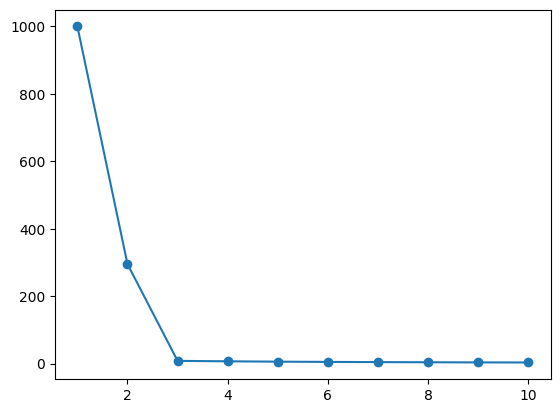

In [284]:
plt.plot(A_Range, inertia, marker='o')

In [285]:
Final_kmeans = KMeans(n_clusters=3, random_state=42)

In [286]:
B = Final_kmeans.fit_predict(X_scale)

In [287]:
df['cluster'] = B

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

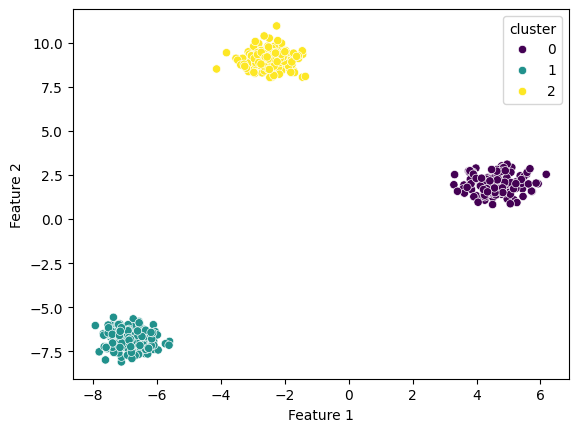

In [288]:
sns.scatterplot(x= df['Feature 1'],
                y= df['Feature 2'], hue= df['cluster'], palette='viridis')

In [289]:
from sklearn.datasets import make_moons

In [290]:
X, _ = make_moons(n_samples=500, noise=0.05, random_state=42)

In [291]:
from sklearn.cluster import KMeans, DBSCAN

In [292]:
df = pd.DataFrame(X, columns= ['feature 1', 'feature 2'])

In [293]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

In [294]:
Final2_kmeans = KMeans(n_clusters=2, random_state=42)

In [295]:
Bb = Final2_kmeans.fit_predict(x_scaled)

In [296]:
df['kmeans_cluster'] = Bb

<Axes: xlabel='feature 1', ylabel='feature 2'>

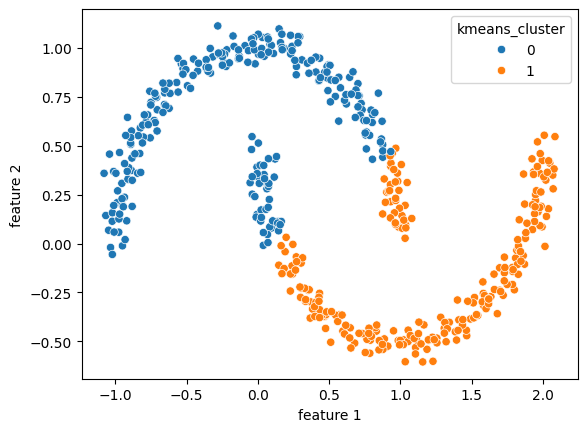

In [297]:
sns.scatterplot(x=df['feature 1'], y=df['feature 2'], hue=df['kmeans_cluster'], palette='tab10')

In [298]:
dbscan = DBSCAN(eps= 0.3, min_samples=5)
f = dbscan.fit_predict(x_scaled)

In [299]:
df['dbscan_cluster'] = f

<Axes: xlabel='feature 1', ylabel='feature 2'>

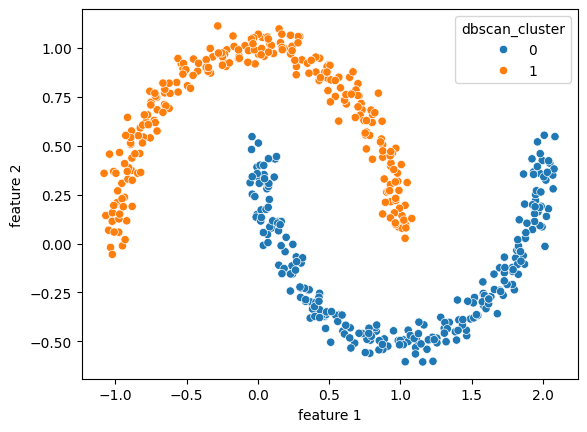

In [300]:
sns.scatterplot(x=df['feature 1'], y=df['feature 2'], hue=df['dbscan_cluster'], palette='tab10')

In [301]:
from sklearn.decomposition import PCA

In [312]:
X, y = make_blobs(n_samples=500, n_features=5, centers=3, cluster_std=1.5, random_state=42)

In [313]:
X

array([[ -9.85712583,   9.52196609,   6.40680626,  -6.81757623,
         -7.86054541],
       [ -8.04717781,   8.40261648,   6.40946097,  -4.33576029,
         -6.70289196],
       [ -3.73690895,   6.7601386 ,   4.24877609,   0.28504117,
         -7.10318219],
       ...,
       [ -5.82805   ,  -7.29173339,   7.48633693,   2.71623974,
          7.33823548],
       [ -2.48648271,   9.67739715,   6.21190845,   1.03031506,
         -7.54637531],
       [ -8.63901448, -10.68852991,   8.36601977,   4.94211449,
          3.77070371]])

In [303]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [304]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [305]:
X_pca

array([[ 1.40522818e+00, -1.73079914e+00],
       [ 1.03463536e+00, -9.82792414e-01],
       [ 1.10182830e+00,  1.09084050e+00],
       [-1.76465839e+00,  1.09970698e-01],
       [ 8.59673831e-01, -1.63970361e+00],
       [ 1.09738958e+00,  1.11937509e+00],
       [ 1.04453451e+00,  1.88953610e+00],
       [-3.14810185e+00, -1.06909853e-01],
       [-1.34287183e+00,  7.48033000e-01],
       [ 4.59419122e-01,  9.66806100e-01],
       [ 1.64897776e+00,  1.95384681e+00],
       [ 7.73369393e-01,  2.09584610e+00],
       [-1.92869648e+00,  9.48608771e-02],
       [ 1.15480661e+00, -1.42564791e+00],
       [ 7.07330515e-01, -1.01056640e+00],
       [ 1.59661674e+00, -1.64931961e+00],
       [-2.40550592e+00, -7.53357753e-01],
       [-1.97627695e+00, -3.59747020e-02],
       [ 1.26193015e+00,  2.72813008e+00],
       [ 1.58339885e+00, -1.46125327e+00],
       [ 1.61435981e+00,  1.29812279e+00],
       [-1.74438705e+00,  1.58820049e-01],
       [-1.88938008e+00,  3.66662930e-01],
       [ 6.

In [306]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['label'] = y

<Axes: xlabel='PC1', ylabel='PC2'>

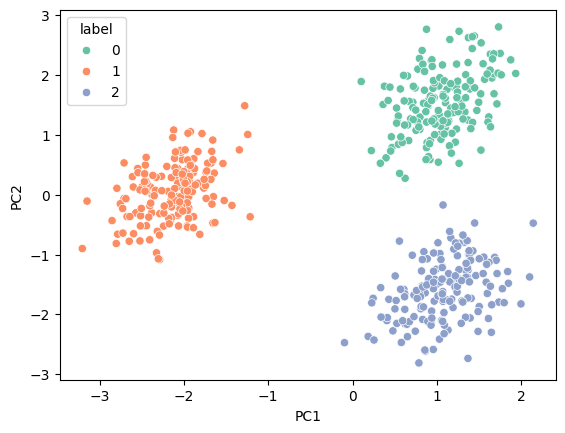

In [311]:
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='label', palette='Set2')